<a href="https://colab.research.google.com/github/rajeshpahari/Own-Work/blob/ML/ML002_Data_cleaning%2CFeature_Eng%2CBias_and_Variances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning,Feature Engineering,Bias and variances

# Feature Selection

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')


In [3]:
# from google.colab import files
# files.upload()

# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d 'prevek18/ames-housing-dataset'
# !unzip /content/ames-housing-dataset.zip


In [4]:
df=pd.read_csv('/content/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
#Create a generic function to drop unnecesary columns:

def df_drop_cols(df,cols):
  df.drop(cols,axis=1,inplace=True)


In [6]:
#Drop first two columns
df_drop_cols(df,['Order','PID'])
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
#create a function to check null values
def check_null_counts(df):
  missing_percentage=100*df.isnull().sum()/len(df)
  missing_value=missing_percentage[missing_percentage>0].sort_values(ascending=False)
  

  return missing_value
  

In [8]:
missing_value=check_null_counts(df)
missing_value

Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Cond        5.426621
Garage Qual        5.426621
Garage Finish      5.426621
Garage Yr Blt      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Cars        0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
BsmtFin SF 1       0.034130
Electrical         0.034130
dtype: float64

In [9]:
def plot_missing(missing_value):
  plt.figure(figsize=(15,8))
  sns.barplot(x=missing_value.index,y=missing_value,palette='crest')
  plt.xticks(rotation =90);


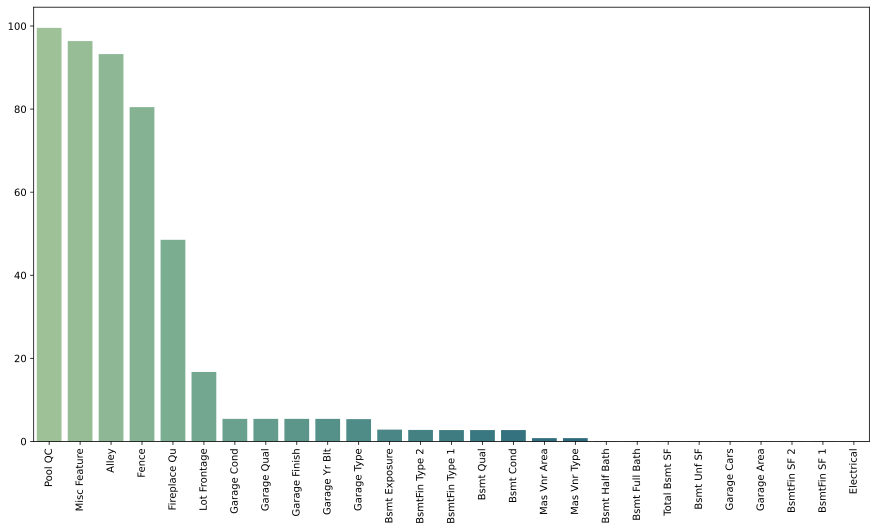

In [10]:
plot_missing(check_null_counts(df))

In [11]:
#Inspect the missing Data Row Wise first
missing_value[missing_value<1]

Mas Vnr Area      0.784983
Mas Vnr Type      0.784983
Bsmt Half Bath    0.068259
Bsmt Full Bath    0.068259
Total Bsmt SF     0.034130
Bsmt Unf SF       0.034130
Garage Cars       0.034130
Garage Area       0.034130
BsmtFin SF 2      0.034130
BsmtFin SF 1      0.034130
Electrical        0.034130
dtype: float64

In [12]:
#Lets drop one by One
df[df['Electrical'].isnull()][['BsmtFin SF 1','BsmtFin SF 2','Garage Area','Garage Cars','Bsmt Unf SF','Total Bsmt SF']]
#None of these are Null
df[df['Garage Area'].isnull()][['BsmtFin SF 1','BsmtFin SF 2','Garage Area','Garage Cars','Bsmt Unf SF','Total Bsmt SF','Electrical']]

#Only 2 features are symmetrical
#Lets see Other
df[df['Total Bsmt SF'].isnull()][['BsmtFin SF 1','BsmtFin SF 2','Garage Area','Garage Cars','Bsmt Unf SF','Garage Area','Electrical']]

#We will use this first to drop

df=df.dropna(subset=['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF'],axis=0)
len(df)

2929

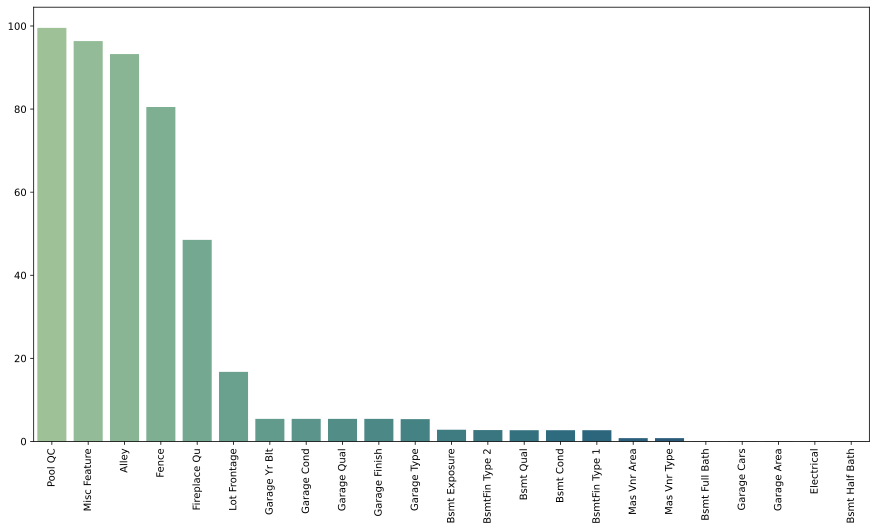

In [13]:
plot_missing(check_null_counts(df))

In [14]:
missing_value=check_null_counts(df)
missing_value[missing_value<1]

Mas Vnr Area      0.785251
Mas Vnr Type      0.785251
Bsmt Full Bath    0.034141
Garage Cars       0.034141
Garage Area       0.034141
Electrical        0.034141
Bsmt Half Bath    0.034141
dtype: float64

In [15]:
#observe again
df[df['Garage Area'].isnull()][['Garage Area','Garage Cars','Total Bsmt SF','Bsmt Full Bath','Electrical']]
#Lets drop gare area and cars
df=df.dropna(subset=['Garage Area','Garage Cars'],axis=0)
len(df)

2928

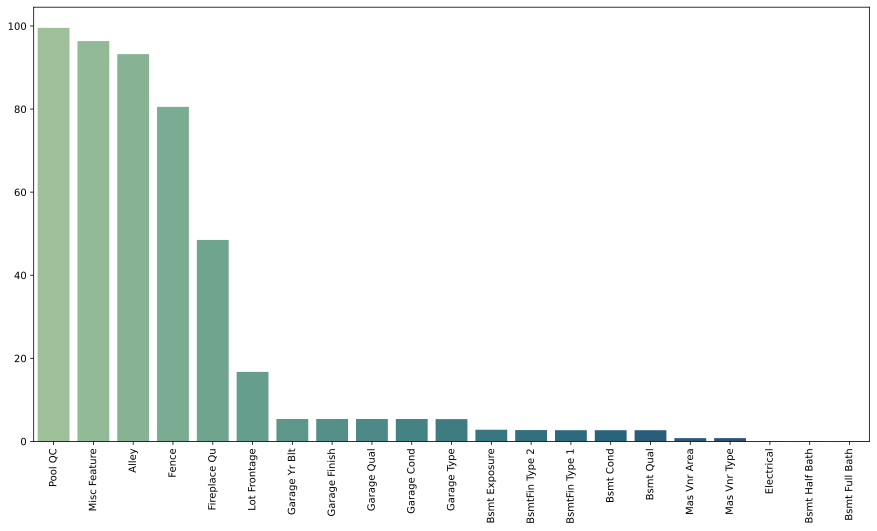

In [16]:
plot_missing(check_null_counts(df))

In [17]:
missing_value=check_null_counts(df)
missing_value[missing_value<1]

Mas Vnr Area      0.785519
Mas Vnr Type      0.785519
Electrical        0.034153
Bsmt Half Bath    0.034153
Bsmt Full Bath    0.034153
dtype: float64

In [18]:
df[df['Bsmt Full Bath'].isnull()][['Mas Vnr Type','Mas Vnr Area','Bsmt Half Bath','Bsmt Full Bath']]
df=df.dropna(subset=['Bsmt Full Bath','Bsmt Half Bath'],axis=0)
len(df)

2927

In [19]:
missing_value=check_null_counts(df)
missing_value[missing_value<1]

Mas Vnr Area    0.785787
Mas Vnr Type    0.785787
Electrical      0.034165
dtype: float64

In [20]:
df[df['Mas Vnr Type'].isnull()][['Electrical','Mas Vnr Type','Mas Vnr Area']]
df[df['Electrical'].isnull()][['Electrical','Mas Vnr Type','Mas Vnr Area']]
#Drop electical none row
df=df.dropna(subset=['Electrical'],axis=0)
len(df)


2926

In [21]:
len(df[df['Mas Vnr Type'].isnull()][['Mas Vnr Type','Mas Vnr Area']])


23

In [22]:
df['Mas Vnr Type'].value_counts()

#Masonry veneer area and Type is an important features .
# However we dont have any value to replace missing values. hence we will drop these rows.
df=df.dropna(subset=['Mas Vnr Type','Mas Vnr Area'],axis=0)
len(df)

2903

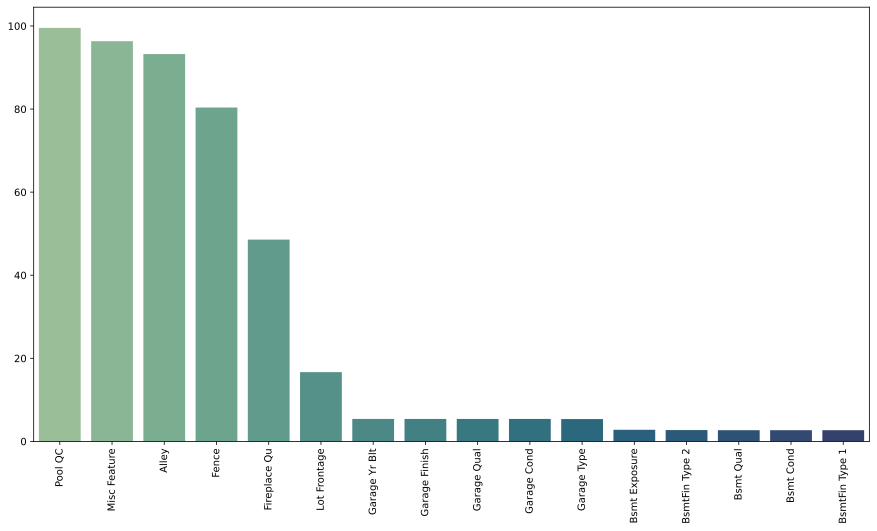

In [23]:
plot_missing(check_null_counts(df))

In [24]:

missing_value=check_null_counts(df)
missing_value

Pool QC           99.552187
Misc Feature      96.348605
Alley             93.248364
Fence             80.365140
Fireplace Qu      48.570444
Lot Frontage      16.672408
Garage Yr Blt      5.408198
Garage Finish      5.408198
Garage Qual        5.408198
Garage Cond        5.408198
Garage Type        5.373751
Bsmt Exposure      2.790217
BsmtFin Type 2     2.721323
Bsmt Qual          2.686876
Bsmt Cond          2.686876
BsmtFin Type 1     2.686876
dtype: float64

In [25]:
#Observe all basement related data
#df['BsmtFin Type 1'].value_counts()
#df['Bsmt Cond'].value_counts()

#Okay...we can assign a value None for missing values

base_cols=['Bsmt Exposure','BsmtFin Type 2','Bsmt Qual','Bsmt Cond','BsmtFin Type 1']
df[df[base_cols].isnull()][base_cols]

df[base_cols]=df[base_cols].fillna('None')

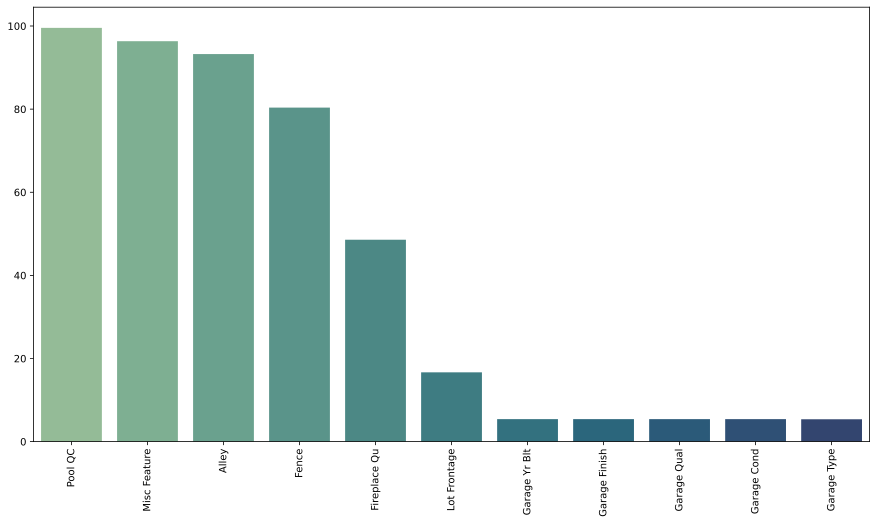

In [26]:
plot_missing(check_null_counts(df))

In [27]:
df['Garage Type'].value_counts()

Attchd     1711
Detchd      780
BuiltIn     182
Basment      36
2Types       23
CarPort      15
Name: Garage Type, dtype: int64

In [28]:
!wget 'https://jse.amstat.org/v19n3/decock/DataDocumentation.txt'


--2023-03-13 02:00:40--  https://jse.amstat.org/v19n3/decock/DataDocumentation.txt
Resolving jse.amstat.org (jse.amstat.org)... 107.180.48.28
Connecting to jse.amstat.org (jse.amstat.org)|107.180.48.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19653 (19K) [text/plain]
Saving to: ‘DataDocumentation.txt’

DataDocumentation.t 100%[===================>]  19.19K  --.-KB/s    in 0s      

2023-03-13 02:00:40 (139 MB/s) - ‘DataDocumentation.txt’ saved [19653/19653]



In [29]:
#Lets check what these columns are

with open('/content/DataDocumentation.txt','r',encoding='cp1252')as f:
  data=f.read()

In [30]:
data.split('\nGarage Type')[1].split('NA')[1]

#So we can replace this with value 0



'\tNo Garage\n\t\t\nGarage Yr Blt (Discrete): Year garage was built\n\t\t\nGarage Finish (Ordinal)\t: Interior finish of the garage\n\n       Fin\tFinished\n       RFn\tRough Finished\t\n       Unf\tUnfinished\n       '

In [31]:
#silimar experiment we can do for Garage Cond
data.split('\nGarage Cond')[1].split('NA')[1]

'\tNo Garage\n\t\t\nPaved Drive (Ordinal): Paved driveway\n\n       Y\tPaved \n       P\tPartial Pavement\n       N\tDirt/Gravel\n\t\t\nWood Deck SF (Continuous): Wood deck area in square feet\n\nOpen Porch SF (Continuous): Open porch area in square feet\n\nEnclosed Porch (Continuous): Enclosed porch area in square feet\n\n3-Ssn Porch (Continuous): Three season porch area in square feet\n\nScreen Porch (Continuous): Screen porch area in square feet\n\nPool Area (Continuous): Pool area in square feet\n\nPool QC (Ordinal): Pool quality\n\t\t\n       Ex\tExcellent\n       Gd\tGood\n       TA\tAverage/Typical\n       Fa\tFair\n       '

In [32]:
##silimar experiment we can do for Garage Cond
# Garage Yr Blt 
# Garage Finish    
# Garage Qual
data.split('\nGarage Qual')[1].split('NA')[1]

'\tNo Garage\n\t\t\nGarage Cond (Ordinal): Garage condition\n\n       Ex\tExcellent\n       Gd\tGood\n       TA\tTypical/Average\n       Fa\tFair\n       Po\tPoor\n       '

In [33]:
#So lets replace none Values of the below columns as None or zero

# Garage Yr Blt      
# Garage Finish      
# Garage Qual        
# Garage Cond        
# Garage Type  

Garage_cols=['Garage Finish','Garage Qual','Garage Cond','Garage Type']
df[Garage_cols].info()
#See the results ..all are objects..hence we will replace with value 'None'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Garage Finish  2746 non-null   object
 1   Garage Qual    2746 non-null   object
 2   Garage Cond    2746 non-null   object
 3   Garage Type    2747 non-null   object
dtypes: object(4)
memory usage: 113.4+ KB


In [34]:
df[Garage_cols]=df[Garage_cols].fillna('None')
df['Garage Yr Blt']=df['Garage Yr Blt'].fillna(0)

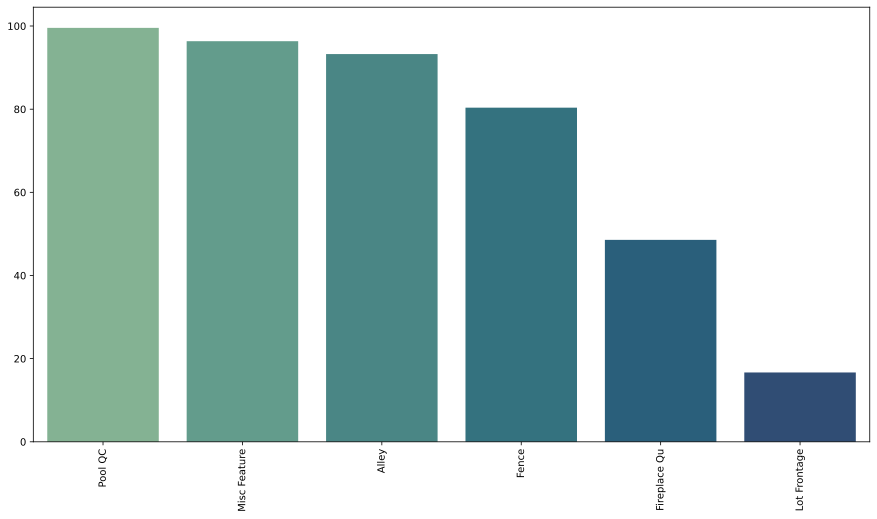

In [35]:
plot_missing(check_null_counts(df))

In [36]:

missing_value=check_null_counts(df)
missing_value

Pool QC         99.552187
Misc Feature    96.348605
Alley           93.248364
Fence           80.365140
Fireplace Qu    48.570444
Lot Frontage    16.672408
dtype: float64

In [37]:
#Leets drop columns where more than 80% data is missing

# Pool QC         99.552187
# Misc Feature    96.348605
# Alley           93.248364
# Fence           80.365140

df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1,inplace=True)
df.shape


(2903, 76)

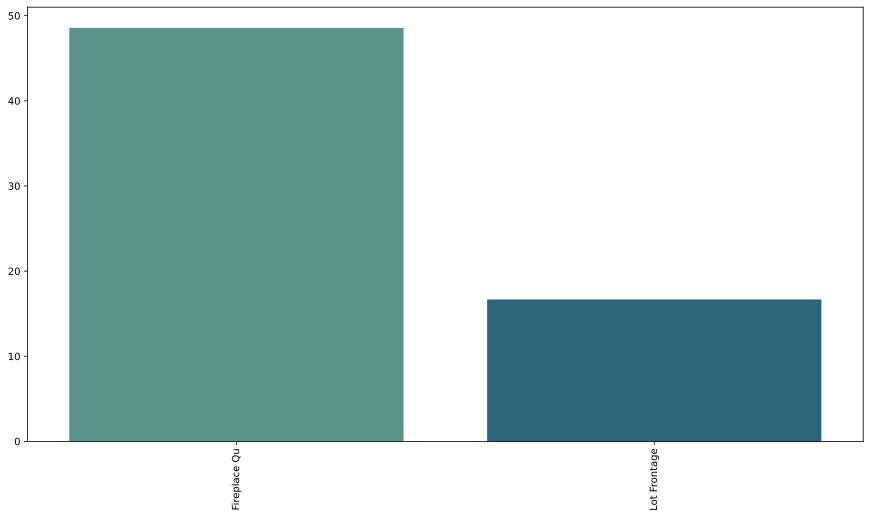

In [38]:
plot_missing(check_null_counts(df))

In [39]:
df['Fireplace Qu'].value_counts()

Gd    734
TA    595
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [40]:
#what does it mean??
data.split('\nFireplaceQu')[1]


' (Ordinal): Fireplace quality\n\n       Ex\tExcellent - Exceptional Masonry Fireplace\n       Gd\tGood - Masonry Fireplace in main level\n       TA\tAverage - Prefabricated Fireplace in main living area or Masonry Fireplace in basement\n       Fa\tFair - Prefabricated Fireplace in basement\n       Po\tPoor - Ben Franklin Stove\n       NA\tNo Fireplace\n\t\t\nGarage Type (Nominal): Garage location\n\t\t\n       2Types\tMore than one type of garage\n       Attchd\tAttached to home\n       Basment\tBasement Garage\n       BuiltIn\tBuilt-In (Garage part of house - typically has room above garage)\n       CarPort\tCar Port\n       Detchd\tDetached from home\n       NA\tNo Garage\n\t\t\nGarage Yr Blt (Discrete): Year garage was built\n\t\t\nGarage Finish (Ordinal)\t: Interior finish of the garage\n\n       Fin\tFinished\n       RFn\tRough Finished\t\n       Unf\tUnfinished\n       NA\tNo Garage\n\t\t\nGarage Cars (Discrete): Size of garage in car capacity\n\nGarage Area (Continuous): Size o

In [41]:
#Okay we can replace with None
df['Fireplace Qu']=df['Fireplace Qu'].fillna('None')

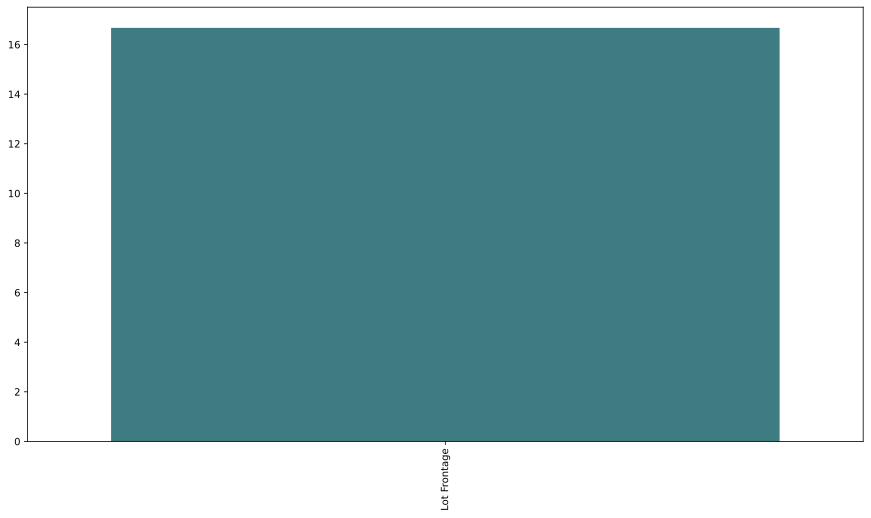

In [42]:
plot_missing(check_null_counts(df))

In [43]:
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     132
50.0     116
75.0     103
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 127, dtype: int64

In [44]:
data.split('\nLot Frontage')[1]

" (Continuous): Linear feet of street connected to property\n\nLot Area (Continuous): Lot size in square feet\n\nStreet (Nominal): Type of road access to property\n\n       Grvl\tGravel\t\n       Pave\tPaved\n       \t\nAlley (Nominal): Type of alley access to property\n\n       Grvl\tGravel\n       Pave\tPaved\n       NA \tNo alley access\n\t\t\nLot Shape (Ordinal): General shape of property\n\n       Reg\tRegular\t\n       IR1\tSlightly irregular\n       IR2\tModerately Irregular\n       IR3\tIrregular\n       \nLand Contour (Nominal): Flatness of the property\n\n       Lvl\tNear Flat/Level\t\n       Bnk\tBanked - Quick and significant rise from street grade to building\n       HLS\tHillside - Significant slope from side to side\n       Low\tDepression\n\t\t\nUtilities (Ordinal): Type of utilities available\n\t\t\n       AllPub\tAll public Utilities (E,G,W,& S)\t\n       NoSewr\tElectricity, Gas, and Water (Septic Tank)\n       NoSeWa\tElectricity and Gas Only\n       ELO\tElectricit

In [45]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

<AxesSubplot:xlabel='Lot Shape', ylabel='Lot Frontage'>

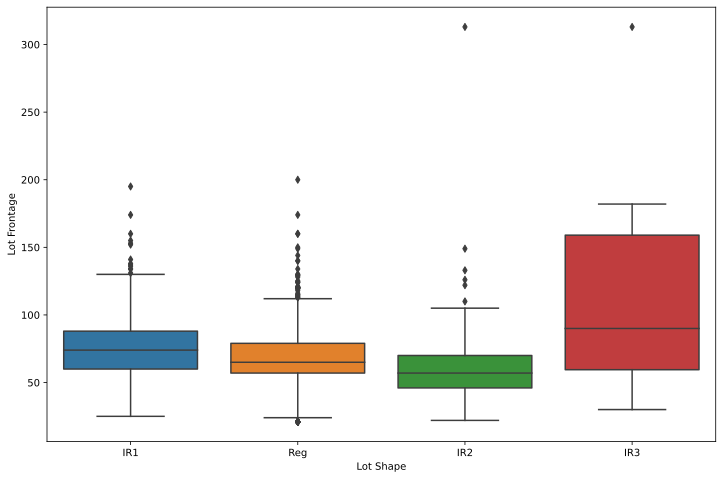

In [46]:
plt.figure(figsize=(12,8),dpi=250)
sns.boxplot(x=df['Lot Shape'],y=df["Lot Frontage"])

In [47]:
#From above graph can we determine there is a relationship between lot shape and lot frontage....
#We can make other assumptions as well...lets assume this for the time being...But this needs domain knowledge to be 
#very sure aboy filling up the missing data

df.groupby('Lot Shape')['Lot Frontage'].mean()


Lot Shape
IR1     74.714729
IR2     68.234043
IR3    117.636364
Reg     66.782634
Name: Lot Frontage, dtype: float64

In [48]:
#New function transform..see the syntax
df['Lot Frontage']=df.groupby('Lot Shape')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

In [49]:
#No Null Values
(df.isnull().sum()>0).sum()

0

#One Hot encoding

In [50]:
#Lets go through the meta datga once again...we found following are numeric ..but its kind of Categorical variables

# MS SubClass
# Overall Qual 
# Overall Cond

#Last two variables are ordinal variable...so we wount do any thing....they have some established relationship with in those

#for first one we will convert it as categorical variable
df['MS SubClass']=df['MS SubClass'].apply(str)



In [51]:
#Now find out all categorical variables
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [52]:
# of those Categorical vars & Numerical Vars
object_features_df=df.select_dtypes(include='object')
num_features_df=df.select_dtypes(exclude='object')

In [53]:
object_dumm=pd.get_dummies(object_features_df,drop_first=True)

In [54]:
final_df=pd.concat([num_features_df,object_dumm],axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,0,0,0,0,1,0,0,0,1,0
2926,74.714729,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,1,0,0,0,1,0
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,0,0,0,0,1,0,0,0,1,0


# Data Split

<AxesSubplot:>

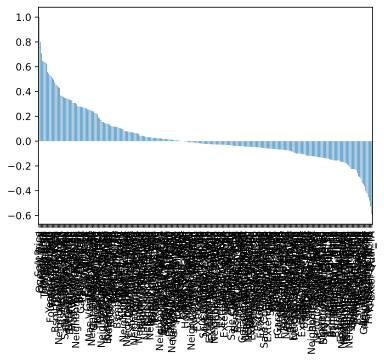

In [55]:
final_df.corr()['SalePrice'].sort_values(ascending=False).plot(kind='bar')
#Some data is negetively co related

In [56]:
X=final_df.drop('SalePrice',axis=1)
y=final_df['SalePrice']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3)

In [58]:
#Evaluation is of 50% other data
X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, test_size=0.5)

In [59]:
#Scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_val=scalar.transform(X_val)
X_test=scalar.transform(X_test)


In [60]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=1)
model.fit(X_train,y_train)

Ridge(alpha=1)

In [61]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_val,y_val))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_val,model.predict(X_val)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_val,model.predict(X_val))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.9228119502559201
Model Score- Testing: 0.919876001162025
-----------------
Mean Absolute Error:Train: 13747.176343000612
Mean Absolute Error:Test: 16440.249858294534
-----------------
RMSE:Train: 22054.62025656254
RMSE:Test: 128.21953774013747


In [62]:
## Create dict to store all these results:
result_scores = {}

## Score the Model on Training and Testing Set
result_scores['Ridge'] = \
            (model.score(X_train,y_train),
            model.score(X_val,y_val))

In [63]:
## Create Function to Print Results
def get_results(x1):
    print("\n{0:20}   {1:4}    {2:4} ".format('Model','Train','Eval'))
    print('-------------------------------------------')
    for i in x1.keys():
        print("{0:20}   {1:<6.4}   {2:<6.4} ".format(i,x1[i][0],x1[i][1]))

In [64]:
get_results(result_scores)


Model                  Train    Eval 
-------------------------------------------
Ridge                  0.9228   0.9199 


# k fold Cross Validations

Cross Val Score

In [65]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Ridge(alpha=100),
                       X_train,
                       y_train,
                       scoring='r2',#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter,
                       cv=5)

In [72]:
scores

array([0.78163447, 0.89129853, 0.72584845, 0.72320515, 0.87961064])

In [73]:
scores.mean()

0.8003194465002338

In [69]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Ridge(alpha=10),
                       X_train,
                       y_train,
                       scoring='r2',#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter,
                       cv=5)

In [71]:
scores.mean()

0.8003194465002338

In [ ]:
# So now we saw alpha=100 is giving the higest result in the experements we did.

Cross Validate

In [75]:
from sklearn.model_selection import cross_validate
model=Ridge(alpha=100)
scoring=['explained_variance','neg_root_mean_squared_error']
scores=cross_validate(model,
                      X_train,
                      y_train,
                      scoring=scoring,
                      cv=10)

In [76]:
scores

{'fit_time': array([0.04923701, 0.03747034, 0.03500271, 0.0428431 , 0.05216646,
        0.03646135, 0.05101728, 0.04534078, 0.0283668 , 0.03235078]),
 'score_time': array([0.00405073, 0.00297189, 0.00541258, 0.00134087, 0.00126052,
        0.00417972, 0.001194  , 0.00318527, 0.00257182, 0.00125885]),
 'test_explained_variance': array([0.88062705, 0.82388875, 0.88238402, 0.88203912, 0.80162   ,
        0.7289456 , 0.84252148, 0.66104686, 0.89940686, 0.87038069]),
 'test_neg_root_mean_squared_error': array([-28078.53421899, -32421.33636207, -29306.39530257, -31303.84679576,
        -35336.61832512, -39825.06062855, -24756.25074282, -48685.44546058,
        -26012.12276511, -25889.14198553])}

In [77]:
pd.DataFrame(scores)

,fit_time,score_time,test_explained_variance,test_neg_root_mean_squared_error
0,0.049237,0.004051,0.880627,-28078.534219
1,0.037470,0.002972,0.823889,-32421.336362
2,0.035003,0.005413,0.882384,-29306.395303
3,0.042843,0.001341,0.882039,-31303.846796
4,0.052166,0.001261,0.801620,-35336.618325
5,0.036461,0.004180,0.728946,-39825.060629
6,0.051017,0.001194,0.842521,-24756.250743
7,0.045341,0.003185,0.661047,-48685.445461
8,0.028367,0.002572,0.899407,-26012.122765
9,0.032351,0.001259,0.870381,-25889.141986


In [80]:
pd.DataFrame(scores).mean()

fit_time                                0.041026
score_time                              0.002743
test_explained_variance                 0.827286
test_neg_root_mean_squared_error   -32161.475259
dtype: float64

In [81]:
model=Ridge(alpha=1)
scoring=['explained_variance','neg_root_mean_squared_error']
scores=cross_validate(model,
                      X_train,
                      y_train,
                      scoring=scoring,
                      cv=10)

In [83]:
pd.DataFrame(scores).mean()

fit_time                                0.039119
score_time                              0.006526
test_explained_variance                 0.791414
test_neg_root_mean_squared_error   -34910.259862
dtype: float64

Elastic net- combination of Ridge and Lasso regression

In [86]:
from sklearn.linear_model import ElasticNet

In [94]:
model=ElasticNet(max_iter=10000)
param_grid={'alpha':[.1,1,5,10,50,100],'l1_ratio':[.1,.5,.7,.95,.99,1]}

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
grid_model=GridSearchCV(estimator=model,param_grid=param_grid,scoring='r2',cv=5,verbose=1,)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.751e+10, tolerance: 1.024e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.106e+09, tolerance: 9.651e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.487e+09, tolerance: 1.034e+09

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='r2', verbose=1)

In [97]:
grid_model.best_estimator_

ElasticNet(alpha=1, l1_ratio=0.7, max_iter=10000)

In [104]:
model=ElasticNet(max_iter=10000,alpha=1,l1_ratio=.7)
model.fit(X_train,y_train)

ElasticNet(alpha=1, l1_ratio=0.7, max_iter=10000)

In [105]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_val,y_val))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_val,model.predict(X_val)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_val,model.predict(X_val))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.8899949851233666
Model Score- Testing: 0.9025561822101965
-----------------
Mean Absolute Error:Train: 15311.107835532628
Mean Absolute Error:Test: 17848.78285220618
-----------------
RMSE:Train: 26328.78344142079
RMSE:Test: 133.59933702008473
